In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [11]:
# Load Training Data
data = pd.read_excel('Training data.xlsx')

In [12]:
# Handle categorical data with Label Encoding
# label_encoders = {}
# for column in data.columns:
#     if data[column].dtype == 'object':
#         le = LabelEncoder()
#         data[column] = le.fit_transform(data[column].astype(str))
#         label_encoders[column] = le

In [13]:
x_train = np.array(data.iloc[:, 0:8])
y_train = np.array(data.iloc[:, 8]).reshape(-1, 1)

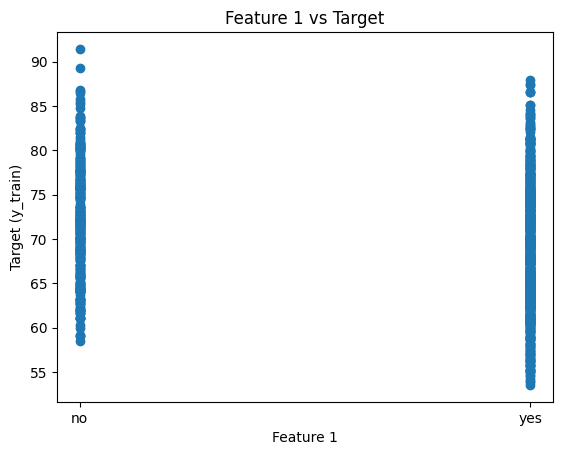

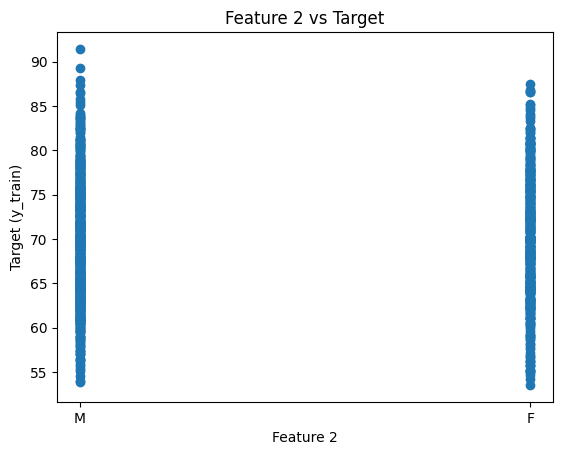

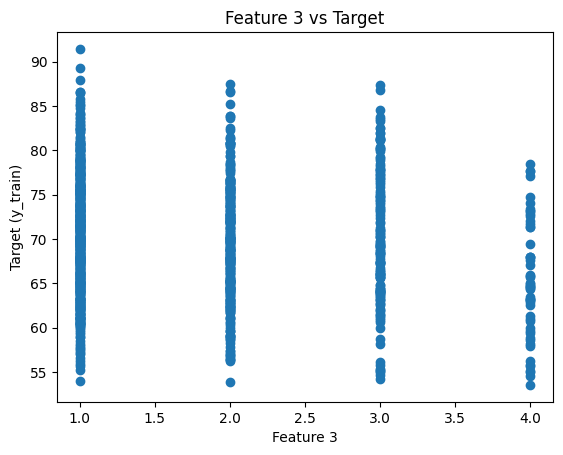

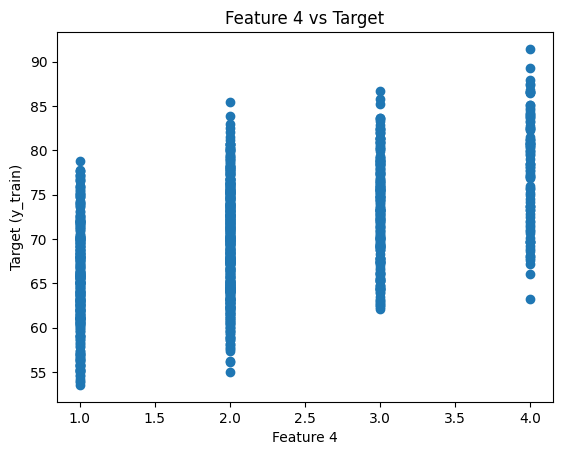

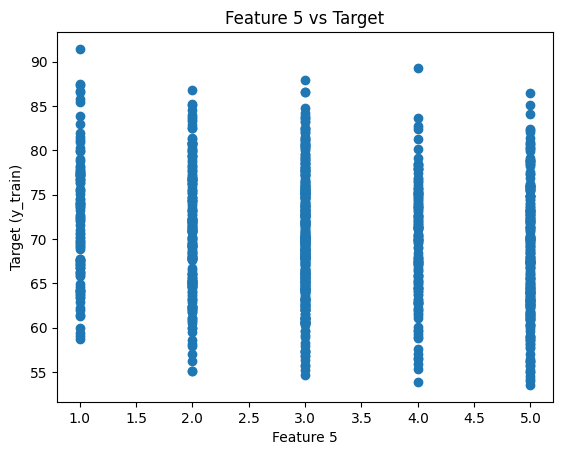

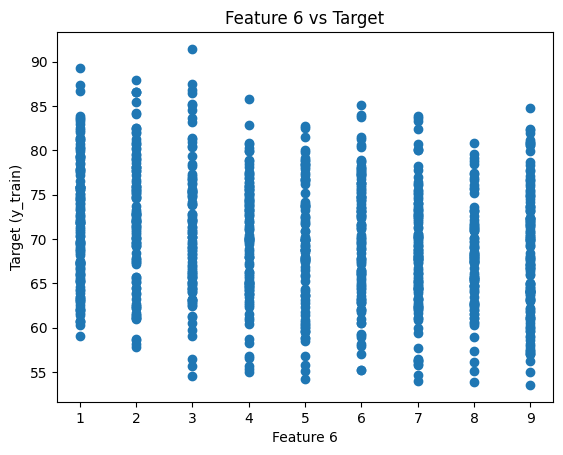

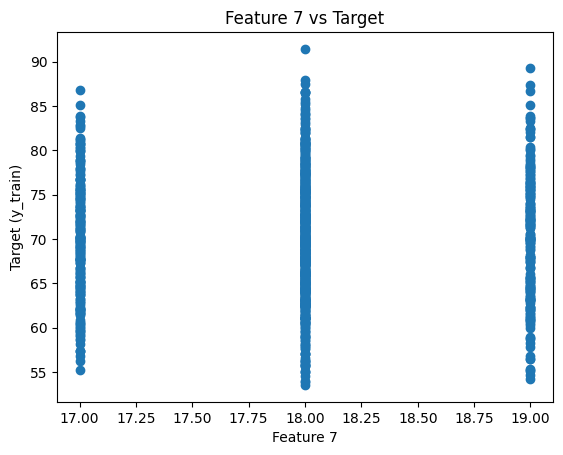

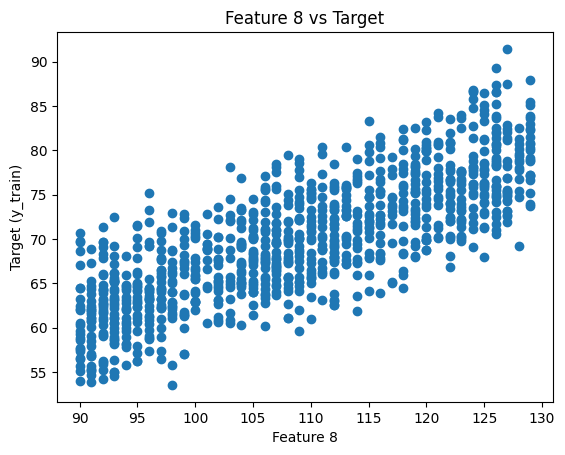

In [14]:
# Plot Features vs. Target
for i in range(x_train.shape[1]):
    plt.scatter(x_train[:, i], y_train)
    plt.xlabel(f'Feature {i+1}')
    plt.ylabel('Target (y_train)')
    plt.title(f'Feature {i+1} vs Target')
    plt.show()


In [15]:
# Feature Engineering
def feature_changing(x_train):
  x_train[x_train == 'yes'] = 1
  x_train[x_train == 'no'] = 0
  x_train[x_train == 'M'] = 1
  x_train[x_train == 'F'] = 0
  return x_train


In [16]:

# Z-Score Normalization
def z_score(x_train):
    x_mean = np.mean(x_train, axis=0)
    x_std = np.std(x_train, axis=0)
    x_train = (x_train - x_mean) / x_std
    return x_train, x_std, x_mean

In [17]:
# Cost Function
def cost(x_train, y_train, w, b):
    m = x_train.shape[0]
    y_pred = np.dot(x_train, w) + b
    loss = np.mean((y_pred - y_train) ** 2)
    return loss

In [18]:
# Gradient Descent
def gradient_descent(x_train, y_train, w, b, learning_rate=0.01):
    m = x_train.shape[0]
    y_pred = np.dot(x_train, w) + b
    dw = (2/m) * np.dot(x_train.T, (y_pred - y_train))
    db = (2/m) * np.sum(y_pred - y_train)
    w -= learning_rate * dw
    b -= learning_rate * db
    return w, b

In [19]:
# Train the Model
x_train = feature_changing(x_train)
x_train = x_train.astype(np.float64)
x_train, x_std, x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1], 1)
b = np.random.randn(1)

old_cost = float('inf')
while abs(old_cost - cost(x_train, y_train, w, b)) > 0.00001:
    old_cost = cost(x_train, y_train, w, b)
    w, b = gradient_descent(x_train, y_train, w, b)


In [20]:
# Load and Prepare Test Data
test_data = pd.read_excel('Test data.xlsx')

In [21]:
x_predict = test_data.iloc[:, :8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean) / x_std
ans = test_data.iloc[:, 8].to_numpy()

In [22]:
# Predict and Evaluate
y_predict = np.dot(x_predict, w) + b

accuracy = 0
for dim in range(len(ans)):
    if abs(y_predict[dim] - ans[dim]) < 0.5:  # tolerance of +- 0.5
        accuracy += 1
accuracy = round(accuracy * 100 / len(ans), 2)
ok = 'Congratulations' if accuracy > 95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Congratulations, your accuracy is 100.0%
